**ESERCIZITAZIONE 5:**

L'obiettivo è il campionamento di una distribuzione di probabilità in 3 dimensioni, attraverso l'utilizzo dell'algoritmo di campionamento Metropolis.

    

**Esercizio 5.1:** Si campiona la distribuzione di probabilità con Metropolis sotto diverse condizioni. L'algoritmo dipende da alcuni fondamentali iperparametri:

1. La funzione di probabilità $\Psi_{n,l}(x,y,z)$ che si desidera campionare. L'esercitazione è svolta per le distribuzioni degli stati $1s$ e $2p$ dell'atomo di idrogeno.

2. La regione di spazio in cui si decide di collocare il punto iniziale del Random Walk. Attraverso un generatore di numeri pseudo-casuali, si estrae tale punto iniziale all'interno di cun cubo di lato $S$ e centrato nel punto $(x_c,y_c,z_c)$.

3. L'ampiezza massima di ogni step $L$ del Random Walk, che deve essere selezionata in modo tale che, mediamente, la probabilità di accettazione della nuova posizione sia intorno al $50\%$.

Dal momento che la statistica dei dati acquisiti è trattata con il data-blocking, è necessario definire anche i seguenti parametri:

1. Dimensione del blocco di equilibrazione $N_1$, che rappresenta il numero di step, accettati o meno, del Random Walk per cui si raggiunge il regime stazionario per il raggio medio della posizione. Su tale blocco iniziale non si accumula statistica, dal momento che le medie fuori equilibrio possono fornire valori che influenzano le medie globali calcolate in seguito.

2. Dimensione $N$ di ogni blocco su ci si accumula statistica. Ovvero il numero di step su cui si calcola la media di blocco.

3. Numero complessivo $M$ di blocchi sui quali si accumula statistica.



Raggio medio $<r>$ dei punti campionati con la distribuzione $\Psi_{1,0}$, fissando gli iperparametri: $L = 0.83$ , $S = 2.2$ , $(x_c,y_c,z_c)=(0,0,0)$ , $N_1 = 100000$, $N = 25000$, $M = 25$. Si riporta sia il grafico dell'andamento della statistica di $<r>$ in funzione del numero di blocchi che lo scatterplot dei singoli punti campionati, il quale deve rappresentare una distribuzione a simmetria sferica (coerente con l'orbitale $1s$):

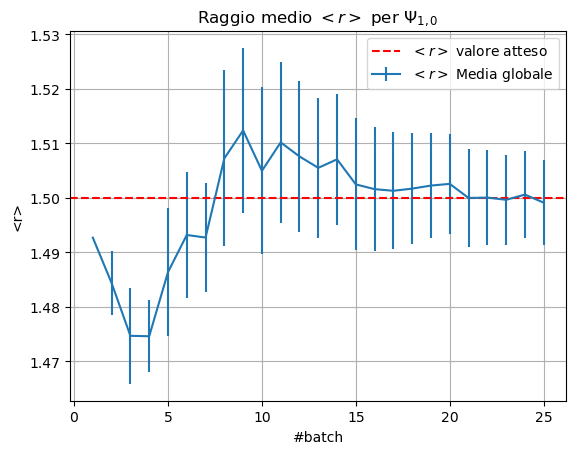

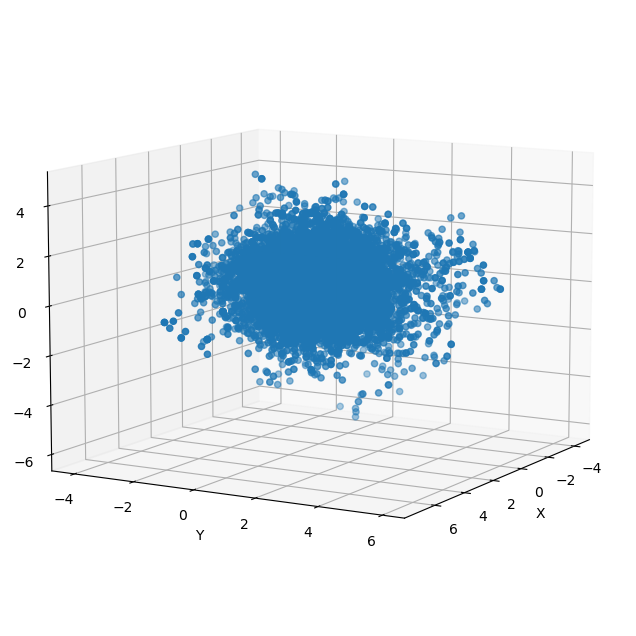

In [24]:
#import asynchat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Analisi dati della statistica per il raggio medio
#Lettura file
filename = "Codici_finali/Esercizio_5.1/rms_1s.txt"
RMS = pd.read_table(filename, delimiter = "\t" , usecols=(0,2,3) , names = ('Number','Media' , 'Stdev_Media'), header = 0 )

#estrarre i dati dalle colonne del file di testo
RMS['Number'] = pd.to_numeric(RMS['Number'] , errors = 'coerce')
RMS['Media'] = pd.to_numeric(RMS['Media'] , errors = 'coerce')
RMS['Stdev_Media'] = pd.to_numeric(RMS['Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Number_vector = RMS['Number']
Media_vector = RMS['Media']
Stdev_Media_vector = RMS['Stdev_Media']

#disegnare grafico di media con barre d'errore (deviazione standard della media)
plt.errorbar(Number_vector, Media_vector, yerr = Stdev_Media_vector, label = '$<r>$ Media globale')
plt.axhline(y = 1.5, color = 'red', linestyle = '--', label = '$<r>$ valore atteso')
plt.xlabel('#batch')
plt.ylabel('<r>')
plt.grid(True)
plt.title("Raggio medio $<r>$ per $\Psi_{1,0}$")
plt.legend()
plt.show()

# --- Rappresentazione dei singoli punti campionati
#Lettura file
filename = "Codici_finali/Esercizio_5.1/points_1s.txt"
POINTS = pd.read_table(filename, delimiter = "\t" , usecols=(0,1,2) , names = ('X','Y' , 'Z'), header = 0 )

#estrarre i dati dalle colonne del file di testo
POINTS['X'] = pd.to_numeric(POINTS['X'] , errors = 'coerce')
POINTS['Y'] = pd.to_numeric(POINTS['Y'] , errors = 'coerce')
POINTS['Z'] = pd.to_numeric(POINTS['Z'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
X_vector = POINTS['X']
Y_vector = POINTS['Y']
Z_vector = POINTS['Z']

#disegnare grafico 3D dei punti campionati
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = '3d')
ax.scatter(X_vector[1:20000], Y_vector[1:20000], Z_vector[1:20000])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(10,30)
plt.show()

Raggio medio dei punti campionati con la distribuzione $\Psi_{2,1}$, fissando gli iperparametri: $L = 2.07$ , $S = 2.2$ , $(x_c,y_c,z_c)=(0,0,0)$ , $N_1 = 10000$, $N = 25000$, $M = 25$. Si riporta sia il grafico dell'andamento della statistica di $<r>$ in funzione del numero di blocchi che lo scatterplot dei singoli punti campionati, il quale deve rappresentare una distribuzione coerente con l'orbitale $2p$:

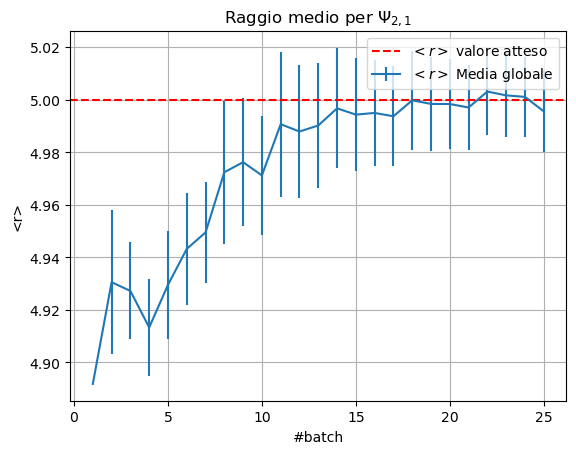

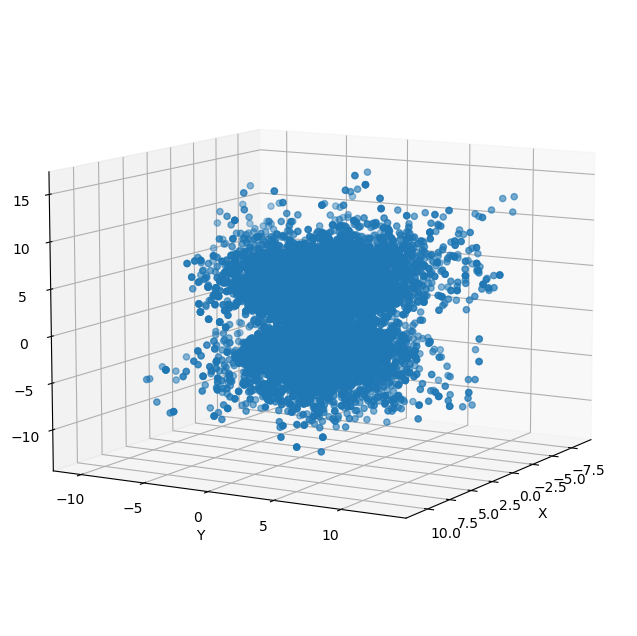

In [25]:
#import asynchat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Analisi dati della statistica per il raggio medio
#Lettura file
filename = "Codici_finali/Esercizio_5.1/rms_2p.txt"
RMS = pd.read_table(filename, delimiter = "\t" , usecols=(0,2,3) , names = ('Number','Media' , 'Stdev_Media'), header = 0 )

#estrarre i dati dalle colonne del file di testo
RMS['Number'] = pd.to_numeric(RMS['Number'] , errors = 'coerce')
RMS['Media'] = pd.to_numeric(RMS['Media'] , errors = 'coerce')
RMS['Stdev_Media'] = pd.to_numeric(RMS['Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Number_vector = RMS['Number']
Media_vector = RMS['Media']
Stdev_Media_vector = RMS['Stdev_Media']

#disegnare grafico di media con barre d'errore (deviazione standard della media)
plt.errorbar(Number_vector, Media_vector, yerr = Stdev_Media_vector, label = '$<r>$ Media globale')
plt.axhline(y = 5.0, color = 'red', linestyle = '--', label = '$<r>$ valore atteso')
plt.xlabel('#batch')
plt.ylabel('<r>')
plt.grid(True)
plt.title("Raggio medio per $\Psi_{2,1}$")
plt.legend()
plt.show()

# --- Rappresentazione dei singoli punti campionati
#Lettura file
filename = "Codici_finali/Esercizio_5.1/points_2p.txt"
POINTS = pd.read_table(filename, delimiter = "\t" , usecols=(0,1,2) , names = ('X','Y' , 'Z'), header = 0 )

#estrarre i dati dalle colonne del file di testo
POINTS['X'] = pd.to_numeric(POINTS['X'] , errors = 'coerce')
POINTS['Y'] = pd.to_numeric(POINTS['Y'] , errors = 'coerce')
POINTS['Z'] = pd.to_numeric(POINTS['Z'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
X_vector = POINTS['X']
Y_vector = POINTS['Y']
Z_vector = POINTS['Z']

#disegnare grafico 3D dei punti campionati
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = '3d')
ax.scatter(X_vector[1:20000], Y_vector[1:20000], Z_vector[1:20000])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(10,30)
plt.show()

Raggio medio dei punti campionati con la distribuzione $\Psi_{1,0}$, fissando gli iperparametri: $L = 0.83$ , $S = 2.2$ , $(x_c,y_c,z_c)=(140,60,-190)$ , $N_1 = 200000$, $N = 25000$, $M = 25$. Scegliendo un punto iniziale collocato sufficientemente lontano dall'origine, ci si aspetta che la fase iniziale del Random Walk sia diretta verso l'origine:

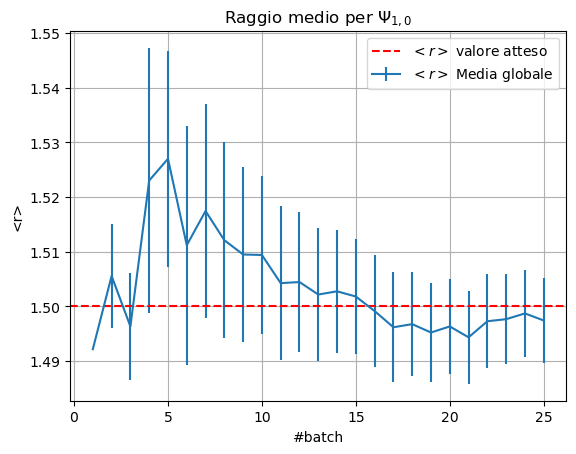

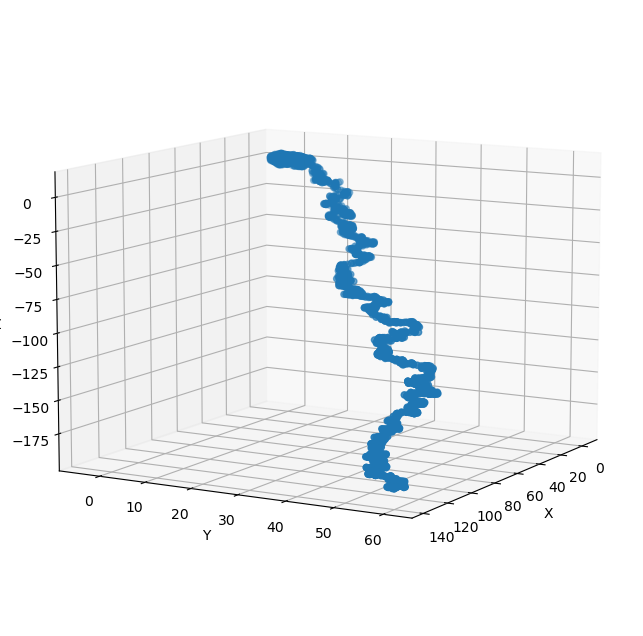

In [22]:
#import asynchat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Analisi dati della statistica per il raggio medio
#Lettura file
filename = "Codici_finali/Esercizio_5.1/rms_1s_far.txt"
RMS = pd.read_table(filename, delimiter = "\t" , usecols=(0,2,3) , names = ('Number','Media' , 'Stdev_Media'), header = 0 )

#estrarre i dati dalle colonne del file di testo
RMS['Number'] = pd.to_numeric(RMS['Number'] , errors = 'coerce')
RMS['Media'] = pd.to_numeric(RMS['Media'] , errors = 'coerce')
RMS['Stdev_Media'] = pd.to_numeric(RMS['Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Number_vector = RMS['Number']
Media_vector = RMS['Media']
Stdev_Media_vector = RMS['Stdev_Media']

#disegnare grafico di media con barre d'errore (deviazione standard della media)
plt.errorbar(Number_vector, Media_vector, yerr = Stdev_Media_vector, label = '$<r>$ Media globale')
plt.axhline(y = 1.5, color = 'red', linestyle = '--', label = '$<r>$ valore atteso')
plt.xlabel('#batch')
plt.ylabel('<r>')
plt.grid(True)
plt.title("Raggio medio per $\Psi_{1,0}$")
plt.legend()
plt.show()

# --- Rappresentazione dei singoli punti campionati
#Lettura file
filename = "Codici_finali/Esercizio_5.1/points_1s_far.txt"
POINTS = pd.read_table(filename, delimiter = "\t" , usecols=(0,1,2) , names = ('X','Y' , 'Z'), header = 0 )

#estrarre i dati dalle colonne del file di testo
POINTS['X'] = pd.to_numeric(POINTS['X'] , errors = 'coerce')
POINTS['Y'] = pd.to_numeric(POINTS['Y'] , errors = 'coerce')
POINTS['Z'] = pd.to_numeric(POINTS['Z'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
X_vector = POINTS['X']
Y_vector = POINTS['Y']
Z_vector = POINTS['Z']

#disegnare grafico 3D dei punti campionati
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = '3d')
ax.scatter(X_vector[1:20000], Y_vector[1:20000], Z_vector[1:20000])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(10,30)
plt.show()

Raggio medio dei punti campionati con la distribuzione $\Psi_{2,1}$, fissando gli iperparametri: $L = 2.07$ , $S = 2.2$ , $(x_c,y_c,z_c)=(140,60,-190)$ , $N_1 = 200000$, $N = 25000$, $M = 25$.

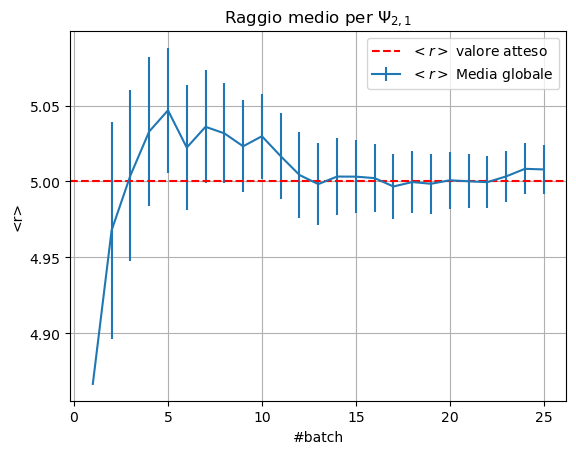

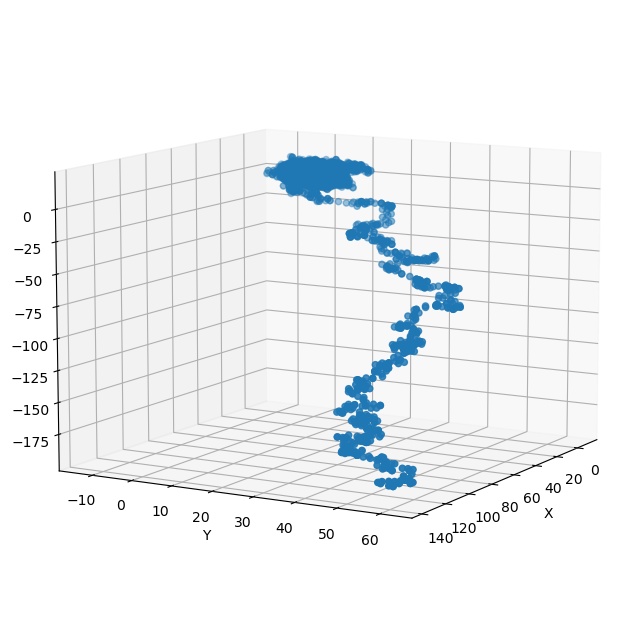

In [31]:
#import asynchat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Analisi dati della statistica per il raggio medio
#Lettura file
filename = "Codici_finali/Esercizio_5.1/rms_2p_far.txt"
RMS = pd.read_table(filename, delimiter = "\t" , usecols=(0,2,3) , names = ('Number','Media' , 'Stdev_Media'), header = 0 )

#estrarre i dati dalle colonne del file di testo
RMS['Number'] = pd.to_numeric(RMS['Number'] , errors = 'coerce')
RMS['Media'] = pd.to_numeric(RMS['Media'] , errors = 'coerce')
RMS['Stdev_Media'] = pd.to_numeric(RMS['Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Number_vector = RMS['Number']
Media_vector = RMS['Media']
Stdev_Media_vector = RMS['Stdev_Media']

#disegnare grafico di media con barre d'errore (deviazione standard della media)
plt.errorbar(Number_vector, Media_vector, yerr = Stdev_Media_vector, label = '$<r>$ Media globale')
plt.axhline(y = 5.0, color = 'red', linestyle = '--', label = '$<r>$ valore atteso')
plt.xlabel('#batch')
plt.ylabel('<r>')
plt.grid(True)
plt.title("Raggio medio per $\Psi_{2,1}$")
plt.legend()
plt.show()

# --- Rappresentazione dei singoli punti campionati
#Lettura file
filename = "Codici_finali/Esercizio_5.1/points_2p_far.txt"
POINTS = pd.read_table(filename, delimiter = "\t" , usecols=(0,1,2) , names = ('X','Y' , 'Z'), header = 0 )

#estrarre i dati dalle colonne del file di testo
POINTS['X'] = pd.to_numeric(POINTS['X'] , errors = 'coerce')
POINTS['Y'] = pd.to_numeric(POINTS['Y'] , errors = 'coerce')
POINTS['Z'] = pd.to_numeric(POINTS['Z'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
X_vector = POINTS['X']
Y_vector = POINTS['Y']
Z_vector = POINTS['Z']

#disegnare grafico 3D dei punti campionati
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = '3d')
ax.scatter(X_vector[1:20000], Y_vector[1:20000], Z_vector[1:20000])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(10,30)
plt.show()

**Esercizio_5.2**: Si ripete il medesimo studio campionando i passi del Random Walk con una distribuzione gaussiana. In dettaglio, partendo dallo step $(x,y,z)$ si effettuerà l'estrazione dello step successivo campionando ciascuna delle tre coordinate da una distribuzione normale centrata nel valore precedente di tale coordinata. Bisogna pertanto definire la varianza $\sigma$ con cui estrarre ciascuno degli incrementi delle 3 coordinate. Imponendo $\sigma \approx 3.4$, dal teorema del limite centrale, la varianza della distribuzione dei punti nelle tre coordinate sarà di un ordine di grandezza pari a 1. Inoltre, è doveroso, anche in questo caso, definire un cutoff $L$ che limiti il range su cui sono estratti gli incrementi, dal momento che, nell'eventualità che un punto venga estratto sulla coda della distribuzione, sarà più impegnativo far tornare il Random Walk verso l'origine.

Nel computo dell'acceptance per l'algoritmo metropolis, il fattore $T(x,y,z|x',y',z')$ a numeratore si semplifica con il fattore $T(x',y',z'|x,y,z)$ per la simmetria della distribuzione gaussiana. Infatti:

$$T(x,y,z|x',y',z') = \frac{1}{(2 \ \sigma^2)^{3/2}} exp(\frac{(x - x')^2+(y - y')^2+(z - z')^2}{2 \ \sigma^2}) = T(x',y',z'|x,y,z)$$

Raggio medio $<r>$ dei punti campionati con la distribuzione $\Psi_{1,0}$, fissando gli iperparametri: $L = 2.18$, $\sigma = 3.48$ , $S = 2.2$ , $(x_c,y_c,z_c)=(0,0,0)$ , $N_1 = 100000$, $N = 5000$, $M = 25$. Si riporta sia il grafico dell'andamento della statistica di $<r>$ in funzione del numero di blocchi che lo scatterplot dei singoli punti campionati, il quale deve rappresentare una distribuzione a simmetria sferica (coerente con l'orbitale $1s$):

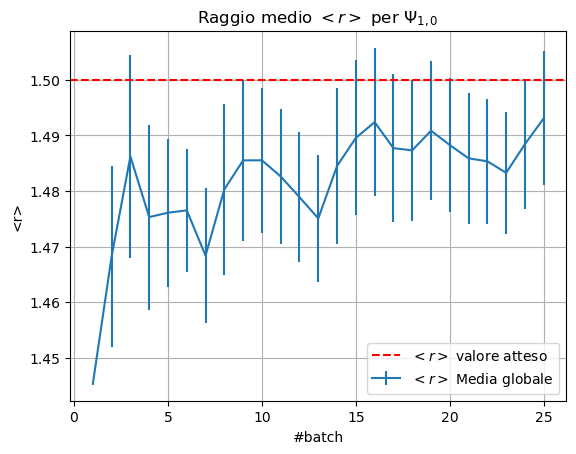

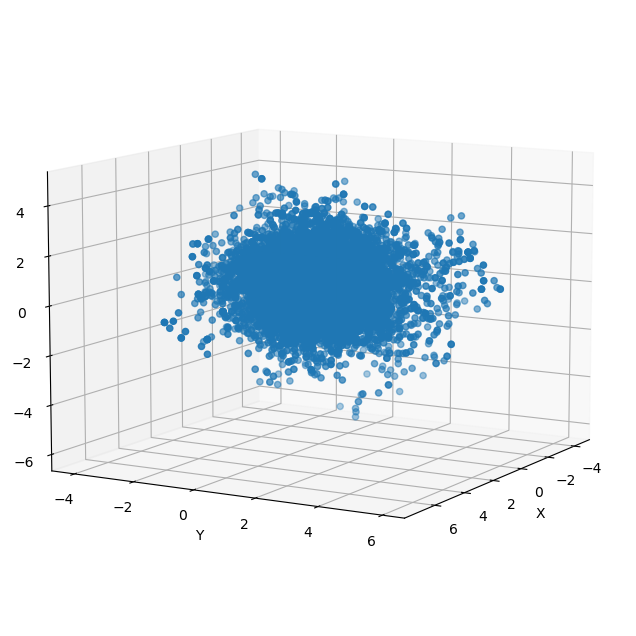

In [20]:
#import asynchat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Analisi dati della statistica per il raggio medio
#Lettura file
filename = "Codici_finali/Esercizio_5.2/rms_1s.txt"
RMS = pd.read_table(filename, delimiter = "\t" , usecols=(0,2,3) , names = ('Number','Media' , 'Stdev_Media'), header = 0 )

#estrarre i dati dalle colonne del file di testo
RMS['Number'] = pd.to_numeric(RMS['Number'] , errors = 'coerce')
RMS['Media'] = pd.to_numeric(RMS['Media'] , errors = 'coerce')
RMS['Stdev_Media'] = pd.to_numeric(RMS['Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Number_vector = RMS['Number']
Media_vector = RMS['Media']
Stdev_Media_vector = RMS['Stdev_Media']

#disegnare grafico di media con barre d'errore (deviazione standard della media)
plt.errorbar(Number_vector, Media_vector, yerr = Stdev_Media_vector, label = '$<r>$ Media globale')
plt.axhline(y = 1.5, color = 'red', linestyle = '--', label = '$<r>$ valore atteso')
plt.xlabel('#batch')
plt.ylabel('<r>')
plt.grid(True)
plt.title("Raggio medio $<r>$ per $\Psi_{1,0}$")
plt.legend()
plt.show()

# --- Rappresentazione dei singoli punti campionati
#Lettura file
filename = "Codici_finali/Esercizio_5.1/points_1s.txt"
POINTS = pd.read_table(filename, delimiter = "\t" , usecols=(0,1,2) , names = ('X','Y' , 'Z'), header = 0 )

#estrarre i dati dalle colonne del file di testo
POINTS['X'] = pd.to_numeric(POINTS['X'] , errors = 'coerce')
POINTS['Y'] = pd.to_numeric(POINTS['Y'] , errors = 'coerce')
POINTS['Z'] = pd.to_numeric(POINTS['Z'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
X_vector = POINTS['X']
Y_vector = POINTS['Y']
Z_vector = POINTS['Z']

#disegnare grafico 3D dei punti campionati
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = '3d')
ax.scatter(X_vector[1:20000], Y_vector[1:20000], Z_vector[1:20000])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(10,30)
plt.show()

Raggio medio dei punti campionati con la distribuzione $\Psi_{2,1}$, fissando gli iperparametri: $L = 6.87$ , $\sigma = 3.48$, $S = 2.2$ , $(x_c,y_c,z_c)=(0,0,0)$ , $N_1 = 10000$, $N = 25000$, $M = 25$. Si riporta sia il grafico dell'andamento della statistica di $<r>$ in funzione del numero di blocchi che lo scatterplot dei singoli punti campionati, il quale deve rappresentare una distribuzione coerente con l'orbitale $2p$:

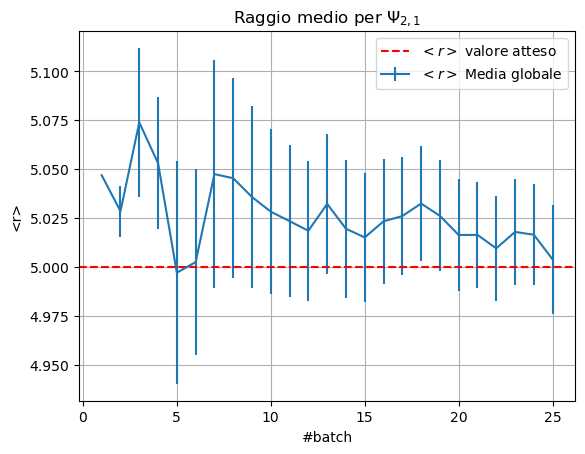

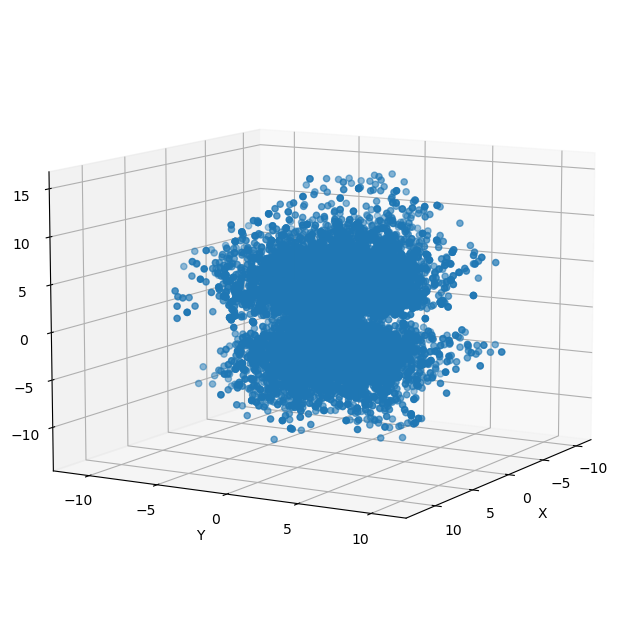

In [27]:
#import asynchat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Analisi dati della statistica per il raggio medio
#Lettura file
filename = "Codici_finali/Esercizio_5.2/rms_2p.txt"
RMS = pd.read_table(filename, delimiter = "\t" , usecols=(0,2,3) , names = ('Number','Media' , 'Stdev_Media'), header = 0 )

#estrarre i dati dalle colonne del file di testo
RMS['Number'] = pd.to_numeric(RMS['Number'] , errors = 'coerce')
RMS['Media'] = pd.to_numeric(RMS['Media'] , errors = 'coerce')
RMS['Stdev_Media'] = pd.to_numeric(RMS['Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Number_vector = RMS['Number']
Media_vector = RMS['Media']
Stdev_Media_vector = RMS['Stdev_Media']

#disegnare grafico di media con barre d'errore (deviazione standard della media)
plt.errorbar(Number_vector, Media_vector, yerr = Stdev_Media_vector, label = '$<r>$ Media globale')
plt.axhline(y = 5.0, color = 'red', linestyle = '--', label = '$<r>$ valore atteso')
plt.xlabel('#batch')
plt.ylabel('<r>')
plt.grid(True)
plt.title("Raggio medio per $\Psi_{2,1}$")
plt.legend()
plt.show()

# --- Rappresentazione dei singoli punti campionati
#Lettura file
filename = "Codici_finali/Esercizio_5.2/points_2p.txt"
POINTS = pd.read_table(filename, delimiter = "\t" , usecols=(0,1,2) , names = ('X','Y' , 'Z'), header = 0 )

#estrarre i dati dalle colonne del file di testo
POINTS['X'] = pd.to_numeric(POINTS['X'] , errors = 'coerce')
POINTS['Y'] = pd.to_numeric(POINTS['Y'] , errors = 'coerce')
POINTS['Z'] = pd.to_numeric(POINTS['Z'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
X_vector = POINTS['X']
Y_vector = POINTS['Y']
Z_vector = POINTS['Z']

#disegnare grafico 3D dei punti campionati
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = '3d')
ax.scatter(X_vector[1:20000], Y_vector[1:20000], Z_vector[1:20000])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(10,30)
plt.show()

Raggio medio dei punti campionati con la distribuzione $\Psi_{1,0}$, fissando gli iperparametri: $L = 1.88$ , $\sigma = 3.48$, $S = 2.2$ , $(x_c,y_c,z_c)=(140,60,-190)$ , $N_1 = 200000$, $N = 5000$, $M = 25$. Scegliendo un punto iniziale collocato sufficientemente lontano dall'origine, ci si aspetta che la fase iniziale del Random Walk sia diretta verso l'origine:

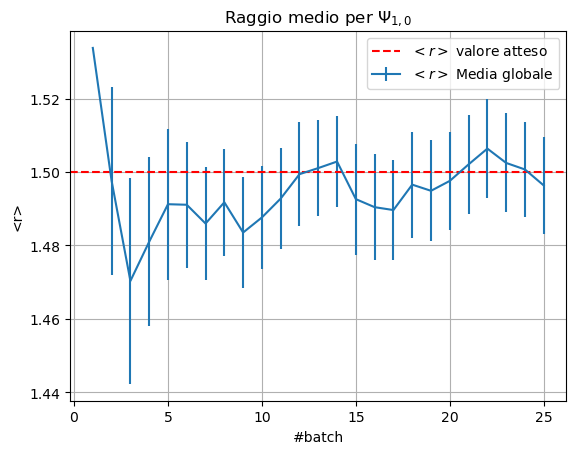

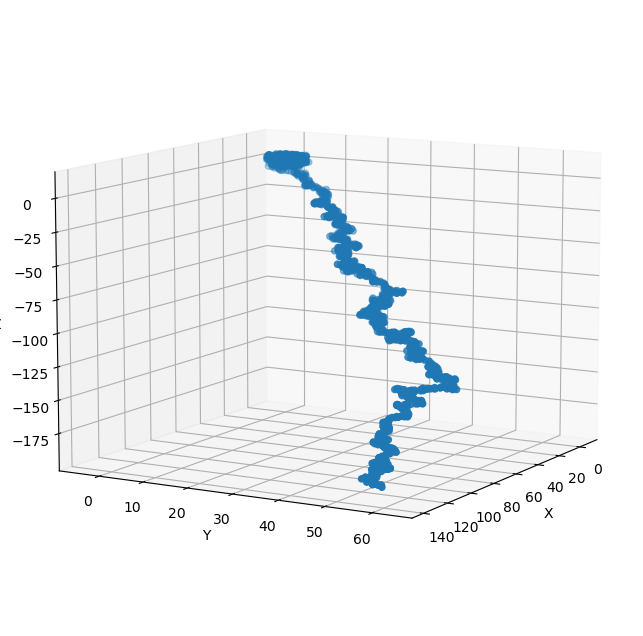

In [18]:
#import asynchat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Analisi dati della statistica per il raggio medio
#Lettura file
filename = "Codici_finali/Esercizio_5.2/rms_1s_far.txt"
RMS = pd.read_table(filename, delimiter = "\t" , usecols=(0,2,3) , names = ('Number','Media' , 'Stdev_Media'), header = 0 )

#estrarre i dati dalle colonne del file di testo
RMS['Number'] = pd.to_numeric(RMS['Number'] , errors = 'coerce')
RMS['Media'] = pd.to_numeric(RMS['Media'] , errors = 'coerce')
RMS['Stdev_Media'] = pd.to_numeric(RMS['Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Number_vector = RMS['Number']
Media_vector = RMS['Media']
Stdev_Media_vector = RMS['Stdev_Media']

#disegnare grafico di media con barre d'errore (deviazione standard della media)
plt.errorbar(Number_vector, Media_vector, yerr = Stdev_Media_vector, label = '$<r>$ Media globale')
plt.axhline(y = 1.5, color = 'red', linestyle = '--', label = '$<r>$ valore atteso')
plt.xlabel('#batch')
plt.ylabel('<r>')
plt.grid(True)
plt.title("Raggio medio per $\Psi_{1,0}$")
plt.legend()
plt.show()

# --- Rappresentazione dei singoli punti campionati
#Lettura file
filename = "Codici_finali/Esercizio_5.2/points_1s_far.txt"
POINTS = pd.read_table(filename, delimiter = "\t" , usecols=(0,1,2) , names = ('X','Y' , 'Z'), header = 0 )

#estrarre i dati dalle colonne del file di testo
POINTS['X'] = pd.to_numeric(POINTS['X'] , errors = 'coerce')
POINTS['Y'] = pd.to_numeric(POINTS['Y'] , errors = 'coerce')
POINTS['Z'] = pd.to_numeric(POINTS['Z'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
X_vector = POINTS['X']
Y_vector = POINTS['Y']
Z_vector = POINTS['Z']

#disegnare grafico 3D dei punti campionati
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = '3d')
ax.scatter(X_vector[1:20000], Y_vector[1:20000], Z_vector[1:20000])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(10,30)
plt.show()

Raggio medio dei punti campionati con la distribuzione $\Psi_{2,1}$, fissando gli iperparametri: $L = 6.56$ , $\sigma = 3.48$, $S = 2.2$ , $(x_c,y_c,z_c)=(140,60,-190)$ , $N_1 = 200000$, $N = 5000$, $M = 25$. Scegliendo un punto iniziale collocato sufficientemente lontano dall'origine, ci si aspetta che la fase iniziale del Random Walk sia diretta verso l'origine:

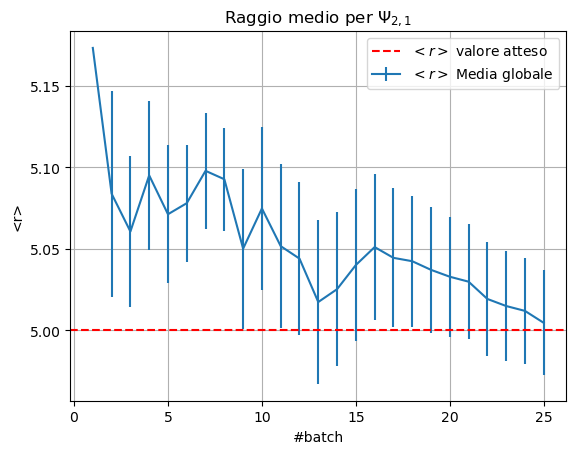

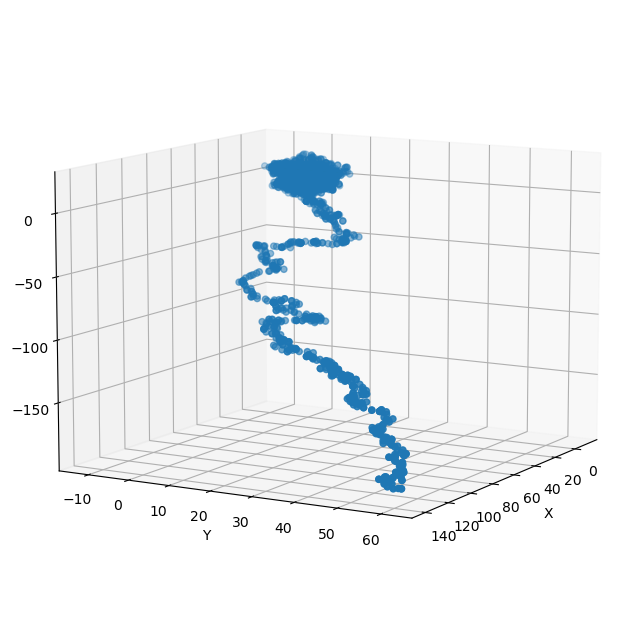

In [28]:
#import asynchat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Analisi dati della statistica per il raggio medio
#Lettura file
filename = "Codici_finali/Esercizio_5.2/rms_2p_far.txt"
RMS = pd.read_table(filename, delimiter = "\t" , usecols=(0,2,3) , names = ('Number','Media' , 'Stdev_Media'), header = 0 )

#estrarre i dati dalle colonne del file di testo
RMS['Number'] = pd.to_numeric(RMS['Number'] , errors = 'coerce')
RMS['Media'] = pd.to_numeric(RMS['Media'] , errors = 'coerce')
RMS['Stdev_Media'] = pd.to_numeric(RMS['Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Number_vector = RMS['Number']
Media_vector = RMS['Media']
Stdev_Media_vector = RMS['Stdev_Media']

#disegnare grafico di media con barre d'errore (deviazione standard della media)
plt.errorbar(Number_vector, Media_vector, yerr = Stdev_Media_vector, label = '$<r>$ Media globale')
plt.axhline(y = 5.0, color = 'red', linestyle = '--', label = '$<r>$ valore atteso')
plt.xlabel('#batch')
plt.ylabel('<r>')
plt.grid(True)
plt.title("Raggio medio per $\Psi_{2,1}$")
plt.legend()
plt.show()

# --- Rappresentazione dei singoli punti campionati
#Lettura file
filename = "Codici_finali/Esercizio_5.2/points_2p_far.txt"
POINTS = pd.read_table(filename, delimiter = "\t" , usecols=(0,1,2) , names = ('X','Y' , 'Z'), header = 0 )

#estrarre i dati dalle colonne del file di testo
POINTS['X'] = pd.to_numeric(POINTS['X'] , errors = 'coerce')
POINTS['Y'] = pd.to_numeric(POINTS['Y'] , errors = 'coerce')
POINTS['Z'] = pd.to_numeric(POINTS['Z'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
X_vector = POINTS['X']
Y_vector = POINTS['Y']
Z_vector = POINTS['Z']

#disegnare grafico 3D dei punti campionati
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = '3d')
ax.scatter(X_vector[1:20000], Y_vector[1:20000], Z_vector[1:20000])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(10,30)
plt.show()

Come prima osservazione, si è scelto, nel campionamento di $\psi_{2,1}$, un cutoff $L$ più elevato per portare l'acceptance attorno al $50 \ \%$, dal momento che tale funzione d'onda presenta dei lobi estesi nello spazio, con $< r > = 5$.

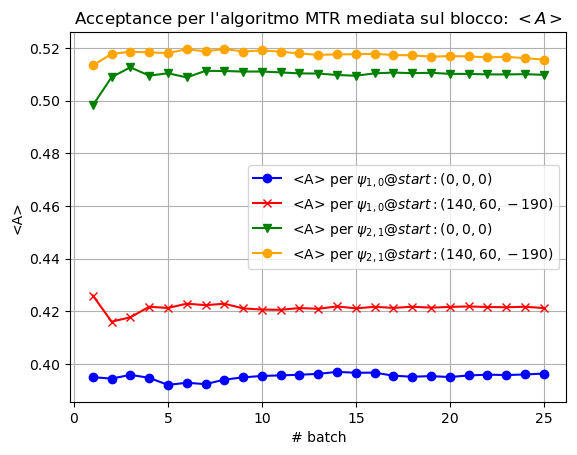

In [29]:
#Lettura file
filename_1 = "Codici_finali/Esercizio_5.2/rms_1s.txt"
filename_2 = "Codici_finali/Esercizio_5.2/rms_1s_far.txt"
filename_3 = "Codici_finali/Esercizio_5.2/rms_2p.txt"
filename_4 = "Codici_finali/Esercizio_5.2/rms_2p_far.txt"
RMS1 = pd.read_table(filename_1, delimiter = "\t" , usecols=(0,4) , names = ('Blk','Accpt'), header = 0 )
RMS2 = pd.read_table(filename_2, delimiter = "\t" , usecols=(0,4) , names = ('Blk','Accpt'), header = 0 )
RMS3 = pd.read_table(filename_3, delimiter = "\t" , usecols=(0,4) , names = ('Blk','Accpt'), header = 0 )
RMS4 = pd.read_table(filename_4, delimiter = "\t" , usecols=(0,4) , names = ('Blk','Accpt'), header = 0 )

#estrarre i dati dalle colonne del file di testo
RMS1['Blk'] = pd.to_numeric(RMS1['Blk'] , errors = 'coerce')
RMS2['Accpt'] = pd.to_numeric(RMS2['Accpt'] , errors = 'coerce')
RMS3['Accpt'] = pd.to_numeric(RMS3['Accpt'] , errors = 'coerce')
RMS4['Accpt'] = pd.to_numeric(RMS4['Accpt'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Number_vector = RMS1['Blk']
Acceptance_vector_1 = RMS1['Accpt']
Acceptance_vector_2 = RMS2['Accpt']
Acceptance_vector_3 = RMS3['Accpt']
Acceptance_vector_4 = RMS4['Accpt']

#disegnare i grafici dell'acceptance in funzione del blocco
plt.plot(Number_vector, Acceptance_vector_1, color='blue', marker = 'o',label = '<A> per $\psi_{1,0} @ start: (0,0,0)$')
plt.plot(Number_vector, Acceptance_vector_2, color='red', marker = 'x',label = '<A> per $\psi_{1,0} @ start: (140,60,-190)$')
plt.plot(Number_vector, Acceptance_vector_3, color='green', marker = 'v',label = '<A> per $\psi_{2,1} @ start: (0,0,0)$')
plt.plot(Number_vector, Acceptance_vector_4, color='orange', marker = 'o',label = '<A> per $\psi_{2,1} @ start: (140,60,-190)$')
plt.title(" Acceptance per l'algoritmo MTR mediata sul blocco: $<A>$ ")
plt.xlabel('# batch')
plt.ylabel('<A>')
plt.grid(True)
plt.legend()
plt.show()

Avendo scelto $\sigma = 3.48$, si sono ottenuti valori di $<r>$ convergenti al valore atteso dopo $25$ blocchi, per ogni scelta della funzione d'onda $\psi$ e del punto di partenza del Random Walk. Tuttavia, imponendo tale parametro, per qualsiasi valore del cutoff $L$ scelto, l'acceptance non supera mai il $43 \ \%$ nel caso del campionamento Metropolis della funzione d'onda $\psi_{1,0}$. 

Si sono sperimentate ulteriori combinazioni di $(L,\sigma)$ tali da portare $<A>$ in prossimità del $50 \ \%$, tuttavia tali parametrizzazioni rendono notevolmente più fragile la convergenza di $<r>$ verso il valore atteso. Ne è riportato un esempio:

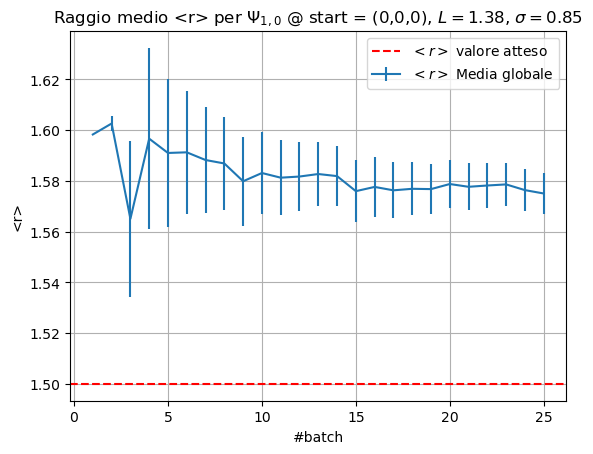

In [30]:
#import asynchat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Analisi dati della statistica per il raggio medio
#Lettura file
filename = "Codici_finali/Esercizio_5.2/rms_1s_L_1.38_s_0.85.txt"
RMS = pd.read_table(filename, delimiter = "\t" , usecols=(0,2,3) , names = ('Number','Media' , 'Stdev_Media'), header = 0 )

#estrarre i dati dalle colonne del file di testo
RMS['Number'] = pd.to_numeric(RMS['Number'] , errors = 'coerce')
RMS['Media'] = pd.to_numeric(RMS['Media'] , errors = 'coerce')
RMS['Stdev_Media'] = pd.to_numeric(RMS['Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Number_vector = RMS['Number']
Media_vector = RMS['Media']
Stdev_Media_vector = RMS['Stdev_Media']

#disegnare grafico di media con barre d'errore (deviazione standard della media)
plt.errorbar(Number_vector, Media_vector, yerr = Stdev_Media_vector, label = '$<r>$ Media globale')
plt.axhline(y = 1.5, color = 'red', linestyle = '--', label = '$<r>$ valore atteso')
plt.xlabel('#batch')
plt.ylabel('<r>')
plt.grid(True)
plt.title("Raggio medio <r> per $\Psi_{1,0}$ @ start = (0,0,0), $L = 1.38$, $\sigma = 0.85$")
plt.legend()
plt.show()

La difficoltà riscontrata nell'identificare un set di iperparametri capace di portare, contemporaneamente, $<r>$ a convergere al valore atteso e $<A>$ al $50 \ \%$ è dovuto soprattuto alla morfologia della funzione d'onda $\psi_{1,0}(x,y,z)$. La scelta di $(L,\sigma)$ deve essere tale da conciliare una buona esplorazione dello spazio $(x,y,z)$ (che comporta la convergenza di $<r>$) con una buona efficienza del campionamento ($<A> \approx 50 \ \%$). L'algoritmo Metropolis tende ad indirizzare il Random Walk verso le regioni dove la densità di probabilità è più elevata, a patto che la dimensione del passo sia adeguata.

Nell'esempio appena riportato, si sono ottimizzati $(L,\sigma)$ tali da portare $<A>$ a circa il $50 \ \%$, ma con tale scelta si sono decisi dei passi troppo ristretti, che portano a campionare lo spazio $3D$ in maniera poco efficiente, impedendo la convergenza di $<r>$ a 1.5 pur avendo utilizzato $N = 25000$ step per ogni batch.

In conclusione, quando si effettua un campionamento di una distribuzione di probabilità $p(x)$ con l'algoritmo Metropolis, non sempre la scelta di un'acceptance intorno al $50 \ \%$ si rivela la scelta più efficiente per campionare i punti nello spazio. La selezione degli iperparametri deve essere attentamente valutata in modo tale da produrre passi di un ordine di grandezza paragonabile a quello del valore atteso di $<r>$.